In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(54.237441269670256, 161.66181427906014),
 (37.08179031909333, 169.02168805575752),
 (15.644163890076783, 43.149501429760164),
 (-73.36735562208581, 113.2962650205244),
 (-51.25883379338373, -43.48175373245522),
 (28.407262164949614, -23.2891828175772),
 (7.6244214340296, -37.57576845301966),
 (73.27821488640902, 64.57379843492348),
 (88.36681971113592, 26.73769998808868),
 (58.452720334168504, -132.3121207201266),
 (19.619555048078155, -135.73039535802633),
 (66.81443817920339, 69.22317801891114),
 (-47.43447092223898, -59.03610059292754),
 (-26.322540097457477, 99.64082868834976),
 (-47.137558994521484, -132.50052346260043),
 (-37.20735576489205, -38.95727677357712),
 (-61.38371616345249, -59.35501263472223),
 (2.423104784688192, -56.4121113851329),
 (31.605308291835016, -147.924648827627),
 (-39.714885790180645, 141.98375862395415),
 (-78.35684662105278, 140.9698346558407),
 (36.17982051470605, 48.50193938441868),
 (9.184953054142525, -168.56964146759634),
 (38.87691347051805, 122.

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
cities

['ust-kamchatsk',
 'nikolskoye',
 'bajil',
 'albany',
 'mar del plata',
 'los llanos de aridane',
 'itarema',
 'amderma',
 'longyearbyen',
 'juneau',
 'hilo',
 'aksarka',
 'rawson',
 'carnarvon',
 'rikitea',
 'laguna',
 'ushuaia',
 'grand-santi',
 'kahului',
 'portland',
 'hobart',
 'zanjan',
 'kapaa',
 'pulandian',
 'faanui',
 'parsabad',
 'busselton',
 'taolanaro',
 'punta arenas',
 'port blair',
 'tabiauea',
 'bluff',
 'maceio',
 'avarua',
 'benguela',
 'beringovskiy',
 'butaritari',
 'rawlins',
 'bredasdorp',
 'new norfolk',
 'jiuquan',
 'dikson',
 'nemuro',
 'kharp',
 'tuktoyaktuk',
 'takoradi',
 'jamestown',
 'bambanglipuro',
 'samusu',
 'kununurra',
 'saint-philippe',
 'isangel',
 'ribeira grande',
 'boysun',
 'sambava',
 'bol',
 'vaini',
 'tamiahua',
 'tobe',
 'castro',
 'roros',
 'alice springs',
 'namikupa',
 'vila velha',
 'victoria',
 'kuche',
 'georgetown',
 'bulgan',
 'hasaki',
 'hithadhoo',
 'kaitangata',
 'ambatondrazaka',
 'santiago del estero',
 'katsuura',
 'bambous 

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a223963a9ff2a5739e2391ad3040da99


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Import the datetime module from the datetime library.
from datetime import datetime

Beginning Data Retrieval     
-----------------------------


In [12]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
set_count = 1
record_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | bajil
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | juneau
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | aksarka
Processing Record 13 of Set 1 | rawson
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | laguna
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | grand-santi
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | hobart
Processing Record 22 o

Processing Record 38 of Set 4 | maraba
Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | padang
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | japura
Processing Record 44 of Set 4 | asosa
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | gaziantep
Processing Record 47 of Set 4 | yanaul
Processing Record 48 of Set 4 | sao raimundo nonato
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | sri aman
Processing Record 1 of Set 5 | north vernon
Processing Record 2 of Set 5 | mehran
Processing Record 3 of Set 5 | angatuba
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | kletnya
Processing Record 6 of Set 5 | ossora
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | cabedelo
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | viedma
Processing Record 11 of Set 5 | fairba

Processing Record 34 of Set 8 | haimen
Processing Record 35 of Set 8 | luorong
Processing Record 36 of Set 8 | half moon bay
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | timmins
Processing Record 40 of Set 8 | kalemie
Processing Record 41 of Set 8 | luena
Processing Record 42 of Set 8 | kaeo
Processing Record 43 of Set 8 | nelson bay
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 48 of Set 8 | la uribe
City not found. Skipping...
Processing Record 49 of Set 8 | jiazi
Processing Record 50 of Set 8 | sale
Processing Record 1 of Set 9 | pangnirtung
Processing Record 2 of Set 9 | coihaique
Processing Record 3 of Set 9 | oriximina
Processing Record 4 of Set 9 | mahajanga
Processing Record 5 of Set 9 | college
Processing Reco

Processing Record 22 of Set 12 | tuensang
Processing Record 23 of Set 12 | jomalig
City not found. Skipping...
Processing Record 24 of Set 12 | esperance
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | brownsville
Processing Record 27 of Set 12 | tibati
Processing Record 28 of Set 12 | plettenberg bay
Processing Record 29 of Set 12 | sorong
Processing Record 30 of Set 12 | yatou
Processing Record 31 of Set 12 | shangrao
Processing Record 32 of Set 12 | waldbrol
Processing Record 33 of Set 12 | bo
City not found. Skipping...
Processing Record 34 of Set 12 | manapparai
Processing Record 35 of Set 12 | luwuk
Processing Record 36 of Set 12 | auray
Processing Record 37 of Set 12 | high level
Processing Record 38 of Set 12 | navalmoral de la mata
Processing Record 39 of Set 12 | tuban
Processing Record 40 of Set 12 | hofn
Processing Record 41 of Set 12 | kvitok
Processing Record 42 of Set 12 | ardakan
Processing Record 43 of Set 12 | funabashi
Processing Record 44 of

In [13]:
len(city_data)

575

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,57.20,71,96,4.47,RU,2020-08-22 01:55:59
1,Bajil,15.06,43.29,88.48,62,83,8.08,YE,2020-08-22 01:57:40
2,Albany,42.60,-73.97,75.00,89,95,3.80,US,2020-08-22 01:56:01
3,Mar Del Plata,-38.00,-57.56,50.00,93,0,2.24,AR,2020-08-22 01:54:48
4,Los Llanos De Aridane,28.66,-17.92,73.40,83,20,12.75,ES,2020-08-22 01:56:01
5,Itarema,-2.92,-39.92,77.02,89,22,11.27,BR,2020-08-22 01:56:09
6,Longyearbyen,78.22,15.64,40.77,82,77,3.22,SJ,2020-08-22 01:56:19
7,Juneau,58.30,-134.42,55.99,93,90,10.29,US,2020-08-22 01:57:41
8,Hilo,19.73,-155.09,84.20,62,1,10.29,US,2020-08-22 01:56:03
9,Aksarka,66.56,67.80,52.74,81,9,15.12,RU,2020-08-22 01:56:11


In [15]:
new_column_order = ["City", "Country","Date",'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-08-22 01:55:59,59.70,30.79,57.20,71,96,4.47
1,Bajil,YE,2020-08-22 01:57:40,15.06,43.29,88.48,62,83,8.08
2,Albany,US,2020-08-22 01:56:01,42.60,-73.97,75.00,89,95,3.80
3,Mar Del Plata,AR,2020-08-22 01:54:48,-38.00,-57.56,50.00,93,0,2.24
4,Los Llanos De Aridane,ES,2020-08-22 01:56:01,28.66,-17.92,73.40,83,20,12.75
...,...,...,...,...,...,...,...,...,...
570,Hinesville,US,2020-08-22 01:58:04,31.85,-81.60,77.00,83,1,2.44
571,Hopelchen,MX,2020-08-22 01:58:04,19.77,-89.85,83.25,59,52,3.60
572,Salinas,US,2020-08-22 01:58:04,36.68,-121.66,75.00,64,90,14.99
573,Bud,US,2020-08-22 01:56:20,39.45,-86.18,70.00,93,1,3.31


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [17]:
# Extract relevant fields form the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598061485.2508137

In [19]:
lats

0      59.70
1      15.06
2      42.60
3     -38.00
4      28.66
       ...  
570    31.85
571    19.77
572    36.68
573    39.45
574     0.54
Name: Lat, Length: 575, dtype: float64

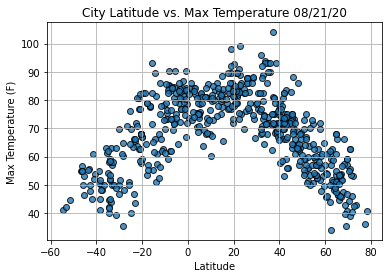

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

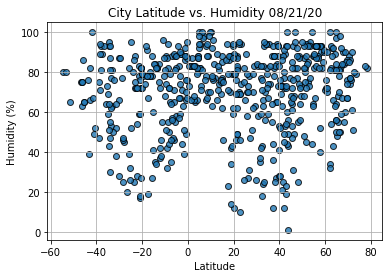

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

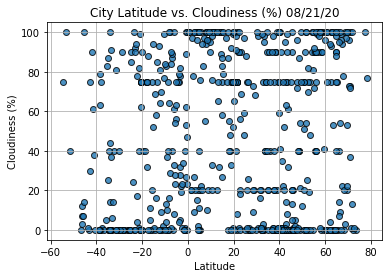

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

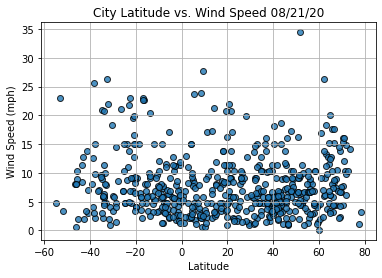

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

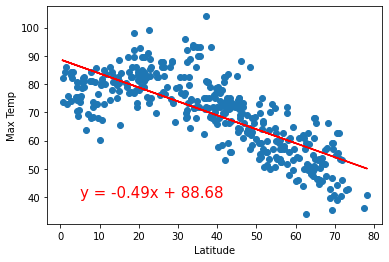

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,40))

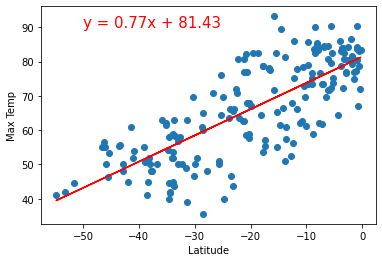

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

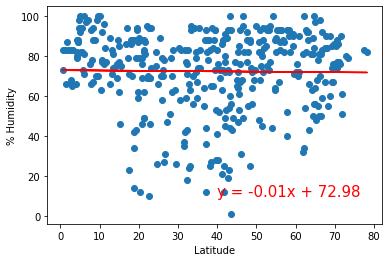

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

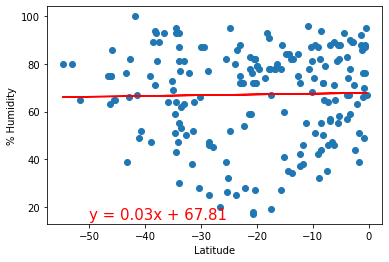

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

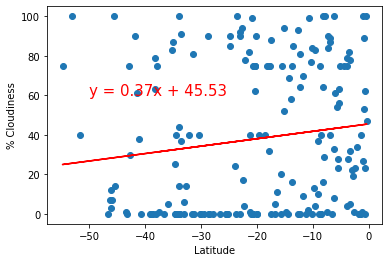

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

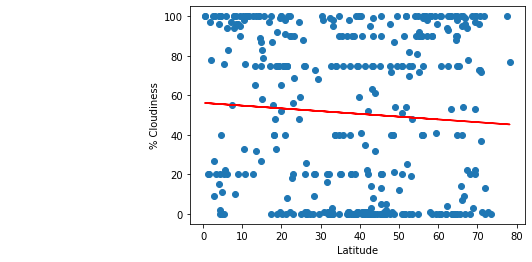

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

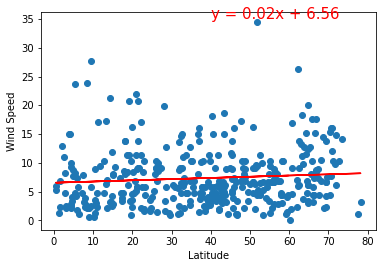

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

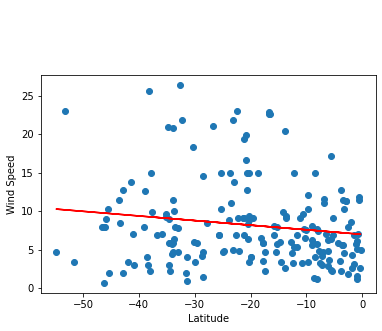

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))